In [1]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
#transition matrix with no movement (every space has an equal 2.5% chance of landing)
matrix = np.zeros((40,40))
prob = {2:(1/36), 3:(2/36), 4:(3/36), 5:(4/36), 6:(5/36), 7:(6/36), 8:(5/36), 9:(4/36), 10:(3/36), 11:(2/36), 12:(1/36)}

for row in range(len(matrix)):
    for col in range(2, 13):
        matrix[row][(col+row)%40] = prob[col]

#print(np.sum(matrix, axis = 1))

#community chest at positions 2, 17, and 33
for row in range(len(matrix)):
    if matrix[row][2] != 0:
        temp = matrix[row][2]
        matrix[row][2] *= (7/8)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp

for row in range(len(matrix)):
    if matrix[row][17] != 0:
        temp = matrix[row][17]
        matrix[row][17] *= (7/8)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp

for row in range(len(matrix)):
    if matrix[row][33] != 0:
        temp = matrix[row][33]
        matrix[row][33] *= (7/8)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp

#print(np.sum(matrix, axis = 1))

#chance at positions 7, 22, 36
for row in range(len(matrix)):
    if matrix[row][7] != 0:
        temp = matrix[row][7]
        matrix[row][7] *= (6/16)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp
        matrix[row][11] += (1/16)*temp
        matrix[row][24] += (1/16)*temp
        matrix[row][39] += (1/16)*temp
        matrix[row][5] += (1/16)*temp
        #next railroad
        matrix[row][15] += (2/16)*temp
        #next utility
        matrix[row][12] += (1/16)*temp
        #3 spaces back
        matrix[row][4] += (1/16)*temp

for row in range(len(matrix)):
    if matrix[row][22] != 0:
        temp = matrix[row][22]
        matrix[row][22] *= (6/16)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp
        matrix[row][11] += (1/16)*temp
        matrix[row][24] += (1/16)*temp
        matrix[row][39] += (1/16)*temp
        matrix[row][5] += (1/16)*temp
        #next railroad
        matrix[row][25] += (2/16)*temp
        #next utility
        matrix[row][28] += (1/16)*temp
        #3 spaces back
        matrix[row][19] += (1/16)*temp

for row in range(len(matrix)):
    if matrix[row][36] != 0:
        temp = matrix[row][36]
        matrix[row][36] *= (6/16)
        matrix[row][0] += (1/16)*temp
        matrix[row][10] += (1/16)*temp
        matrix[row][11] += (1/16)*temp
        matrix[row][24] += (1/16)*temp
        matrix[row][39] += (1/16)*temp
        matrix[row][5] += (1/16)*temp
        #next railroad
        matrix[row][5] += (2/16)*temp
        #next utility
        matrix[row][12] += (1/16)*temp
        #3 spaces back (this time, Community Chest)
        matrix[row][33] += (1/16)*temp*(14/16)
        matrix[row][0] += (1/16)*temp*(1/16)
        matrix[row][10] += (1/16)*temp*(1/16)

#print(np.sum(matrix, axis = 1))

#Go to Jail square
for row in range(len(matrix)):
    if matrix[row][30] != 0:
        temp = matrix[row][30]
        matrix[row][10] += temp
        matrix[row][30] = 0

#print(np.sum(matrix, axis = 1))

#Rolling 3 doubles in a row
matrix = matrix*(215/216)
for row in range(len(matrix)):
    matrix[row][10] += (1/216)

#print(np.sum(matrix, axis = 1))


#initial distribution vector
initial = np.zeros((40, 1))
initial[0][0] = 1

matrix = np.transpose(matrix)

steady_state_matrix = np.linalg.matrix_power(matrix, 900)

answer = np.dot(steady_state_matrix, initial)

answer = list(chain.from_iterable(answer))

listt = []
for i in range(len(answer)):
    listt.append([i, answer[i]])

listt.sort(key=lambda x: x[1], reverse = True)
#print(listt)

print(answer)

Monopoly_spaces = ["Go", "Mediterranean Avenue", "Community Chest 1", "Baltic Avenue", "Income Tax", "Reading Railroad", "Oriental Avenue", "Chance 1", "Vermont Avenue", "Connecticut Avenue", "Jail / Just Visiting", "St. Charles Place", "Electric Company", "States Avenue", "Virginia Avenue","Pennsylvania Railroad", "St. James Place", "Community Chest 2", "Tennessee Avenue", "New York Avenue", "Free Parking", "Kentucky Avenue", "Chance 2", "Indiana Avenue", "Illinois Avenue", "B. & O. Railroad", "Atlantic Avenue", "Ventnor Avenue", "Water Works", "Marvin Gardens", "Go To Jail", "Pacific Avenue", "North Carolina Avenue", "Community Chest 3", "Pennsylvania Avenue", "Short Line", "Chance 3", "Park Place", "Luxury Tax", "Boardwalk"]
#pair = list(zip(Monopoly_spaces, answer))

answer = list(answer)
answer = [round(num, 4)*100 for num in answer]

[0.030884624236292863, 0.02129334823635733, 0.018783832684702732, 0.021600441791837715, 0.023213992145869097, 0.0295897458959339, 0.022543844133981673, 0.00863683806867118, 0.02312472471442117, 0.022951084066954335, 0.06308930349751458, 0.026956189645621385, 0.025981529649308152, 0.02370643860294961, 0.024638615804861753, 0.02921634317072941, 0.027958014241595, 0.026000201889997333, 0.02939714787685599, 0.03087297896221543, 0.02885456737312743, 0.028364458940827977, 0.010480897596308355, 0.027336878417371577, 0.031841239554626435, 0.03064578423603294, 0.027064621577947638, 0.026772660762231153, 0.028061458093592177, 0.02583616488115169, 0.0, 0.026739391326289174, 0.026203817608682806, 0.02363256651538632, 0.02495490657697319, 0.024300486952529458, 0.008652782140249112, 0.021846717725459822, 0.02173897611503907, 0.026232384289468225]


Text(0, 0.5, 'Percent of Finishing Turn on Space')

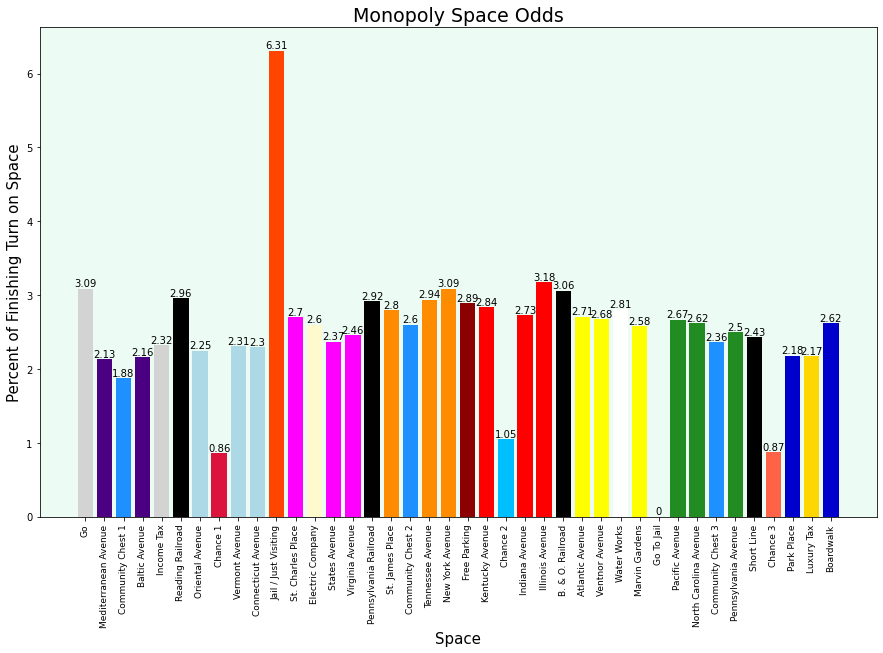

In [5]:
color = ['lightgray', 'indigo', 'dodgerblue', 'indigo', 'lightgray', 'black', 'lightblue', 'crimson', 'lightblue', 'lightblue', 'orangered', 'magenta', 'lemonchiffon', 'magenta', 'magenta', 'black', 'darkorange', 'dodgerblue', 'darkorange', 'darkorange', 'darkred', 'red', 'deepskyblue', 'red', 'red', 'black', 'yellow', 'yellow', 'white', 'yellow', 'royalblue', 'forestgreen', 'forestgreen', 'dodgerblue', 'forestgreen', 'black', 'tomato', 'mediumblue', 'gold', 'mediumblue']
fig = plt.figure(figsize= (15, 9))
ax = fig.add_subplot()
ax.set_facecolor('#ECFCF4')
ax.bar(Monopoly_spaces, answer, color = color)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90, size = 9)
plt.title("Monopoly Space Odds", fontsize = 19)
plt.xlabel("Space", fontsize = 15)
plt.ylabel("Percent of Finishing Turn on Space", fontsize = 15)